/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


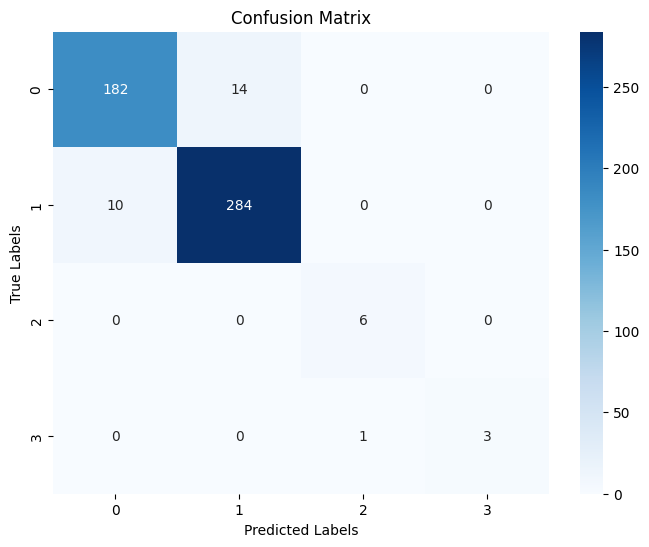

{'Accuracy': 0.95,
 'Precision': 0.9502448865452221,
 'Recall': 0.95,
 'F1 Score': 0.9498488054158158,
 'ROC AUC Score': 0.9933282972750089,
 'Classification Report': '              precision    recall  f1-score   support\n\n           1       0.95      0.93      0.94       196\n           2       0.95      0.97      0.96       294\n           3       0.86      1.00      0.92         6\n           4       1.00      0.75      0.86         4\n\n    accuracy                           0.95       500\n   macro avg       0.94      0.91      0.92       500\nweighted avg       0.95      0.95      0.95       500\n',
 'Confusion Matrix': array([[182,  14,   0,   0],
        [ 10, 284,   0,   0],
        [  0,   0,   6,   0],
        [  0,   0,   1,   3]])}

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample_data/CitarumWater.csv'  # Update this path if the file is in a different directory
data = pd.read_csv(file_path)

# Clean 'Temp' column by removing "°C" and converting to float
data['Temp'] = data['Temp'].str.replace("°C", "").astype(float)

# Drop unnecessary columns that don't contribute to water quality analysis
data_cleaned = data.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'O2'])

# Split the dataset into features (X) and target (y)
X = data_cleaned.drop(columns='Class')
y = data_cleaned['Class']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC AUC

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

# Generate the classification report and confusion matrix
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC Score': roc_auc,
    'Classification Report': class_report,
    'Confusion Matrix': conf_matrix
}

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display evaluation metrics
metrics
